<a href="https://colab.research.google.com/github/Najd-Binrabah/Music-Recommendation-System/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Executive Summary**

The advent of digital music streaming has revolutionized how people discover and enjoy music. As users interact with vast libraries of songs, personalized recommendation systems have become pivotal in enhancing their listening experience. In this project, I aim to develop an advanced music recommendation engine that predicts and suggests songs tailored to individual user preferences, leveraging their listening history and patterns. By employing collaborative filtering techniques and a robust ensemble method, I strive to deliver a highly accurate and engaging recommendation system that continuously adapts to evolving user tastes.

## **Problem and Solution Summary**

**Summary of the Problem**

In today’s fast-paced world, while technology has made life more efficient, it has also led to increased distractions, leaving less time for artistic pursuits. Nevertheless, technological advancements have made it easier for people to find and consume quality content quickly. For companies in the entertainment industry, a key challenge is determining what kind of content their customers are most likely to enjoy. This is crucial as the revenue of many internet-based companies depends on the time consumers spend on their platforms.

Spotify, a leading audio content provider, faces this challenge. With a vast user base and a rich database of preferences, Spotify has grown significantly by recommending the ‘best’ next song to each user. This is achieved through recommendation systems that analyze users’ likes and dislikes to personalize their listening experience. Developing such systems is essential for increasing user engagement and satisfaction, ultimately driving the platform’s success.



**The Rationale Behind The Proposed Solution Design**

Integrating Item-Item Collaborative Filtering (IICF) and Matrix Factorization (MF) offers a compelling approach due to their complementary strengths.

* Item-Item Collaborative Filtering (IICF):

 - Exploration: IICF excels in guiding users toward new musical experiences by recommending items similar to their past preferences, introducing an element of surprise, which is valuable in music recommendations where discovering new artists is cherished.

 - Interpretability: IICF provides better interpretability by basing recommendations on item similarities, making it easier to understand why a particular song or artist is recommended.

* Matrix Factorization (MF):

 - Data Sparsity: MF effectively handles data sparsity by leveraging latent factors, making it valuable in scenarios where user-item interactions are sparse.

 - Scalability and Efficiency: MF is efficient and scalable, capable of seamlessly handling large datasets and numerous users, making it suitable for real-world music recommendation systems.

 - Personalization: MF personalizes recommendations based on individual listening habits, providing a tailored experience.


**Ensemble Method:**

The proposed ensemble method combines predictions from both IICF and MF through voting, capitalizing on the unique strengths of each model. This results in a more comprehensive and well-rounded recommendation system that adapts to diverse user preferences.

By integrating IICF and MF, the proposed solution design aims to deliver a music recommendation system that enhances user engagement through a mix of discovery and personalization. This balanced approach ensures users receive relevant and exciting recommendations, ultimately driving the platform’s success.


### **The objective:**

The primary goal of this project is to develop a music recommendation engine that predicts and suggests songs a user is most likely to enjoy, personalized based on their listening history and preferences.

### **The problem formulation**:

The aim is to build a recommendation system that proposes the top 10 songs for a user, based on the likelihood of the user enjoying those songs.

### **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset:

1.	Song Data: Includes details about song ID, titles, release, artist name, and year of release.
2.	Count Data: Includes user ID, song ID, and the play count for users.


song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

### **Data Source**
http://millionsongdataset.com/

### **Data Processing**

The data was preprocessed, including merging, encoding user and song IDs, and filtering users and songs based on interaction thresholds to ensure a more manageable and relevant dataset.

### **Exploratory Data Analysis**

An exploratory data analysis was conducted to understand the distribution of user interactions, song popularity, and artist preferences. Key insights include identifying the most interacted songs and artists, as well as understanding the play count distribution across years.

### **Model Development and Evaluation**

Various recommendation models were developed and evaluated, including:

1.	Popularity-Based Recommendation Systems: Provided a baseline using average play counts to recommend popular songs.
2.	User-User and Item-Item Collaborative Filtering: Implemented models using cosine similarity and evaluated using precision, recall, RMSE, and F1 score. Optimized models showed improvements but highlighted the need for a balanced approach.
3.	Matrix Factorization: Employed SVD for scalable and personalized recommendations, achieving better precision and recall after hyperparameter tuning.
4.	Clustering-Based Recommendation Systems: Grouped similar users for recommendations, though the results suggested room for further optimization.
5.	Content-Based Recommendation Systems: Leveraged textual features of songs to recommend similar tracks, enhancing the diversity and relevance of recommendations.

### **Final Proposed Solution**

The recommended approach is an ensemble method that combines Matrix Factorization (MF) and Item-Item Collaborative Filtering (IICF) through a voting-based system. This approach leverages the strengths of both models to achieve improved accuracy and reliability in music recommendations.

#### **Importing Libraries and the Dataset**

In [ ]:
# Disable unnecessary warnings to enhance code readability
import warnings
warnings.filterwarnings('ignore')

import numpy as np # Import NumPy for efficient numerical calculations
import pandas as pd # Pandas for data manipulation and analysis

# Matplotlib for basic data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Seaborn for more advanced data visualization
import seaborn as sns

# Scikit-learn for cosine similarity computation between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# DefaultDict from collections to handle dictionaries without raising key errors
from collections import defaultdict

# Mean Squared Error (MSE) from scikit-learn for performance evaluation
from sklearn.metrics import mean_squared_error

#### **Load the dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import  datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

#### **Understanding the data by viewing a few observations**

In [ ]:
# Display the first 10 rows of the 'count_df' DataFrame
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display the first 10 rows of the 'song_df' DataFrame
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


#### **Check the data types and and missing values of each column**

In [ ]:
# Display basic information about the 'count_df' DataFrame
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Display basic information about the 'song_df' DataFrame
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observations and Insights:**
- 'title' has 15 missing values, 'release' has 5 missing values.
- The 'song_id' column in 'count_df' and 'song_df' could potentially be used as a key for merging or joining these DataFrames, facilitating more comprehensive analyses.


In [ ]:
# Merge 'count_df' and 'song_df' on 'song_id' using a left join, drop duplicates from 'song_df', and remove 'Unnamed: 0'
df = pd.merge(count_df, song_df.drop_duplicates('song_id'), on='song_id', how='left').drop('Unnamed: 0', axis=1)

# Display the first 10 records of the merged DataFrame 'df'
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


Encoding IDs can be useful for certain analyses and model performance. While IDs primarily serve as unique identifiers, their non-numeric nature might complicate specific types of analysis. Instead of dropping these columns, encoding them might uncover patterns or relationships that could be beneficial for modeling.

There are various encoding methods:

•	**Label Encoding** assigns numerical values to categorical data without considering order.

•	**Ordinal Encoding** is suitable when there’s a specific order to preserve.

•	**One-Hot Encoding** creates binary columns for each category, but can introduce high dimensionality.

In this situation, Label Encoding is the most appropriate choice since IDs lack a specific order, and it avoids the problem of high dimensionality in the data.

In [ ]:
# Import LabelEncoder from scikit-learn for label encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to "user_id" and "song_id" in the DataFrame df
df['user_id'] = label_encoder.fit_transform(df['user_id'])
df['song_id'] = label_encoder.fit_transform(df['song_id'])

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

### **Exploratory Data Analysis**

#### **Check for missing values in the data**

In [ ]:
# Check and count the null values in each column of the 'df_final' DataFrame
df_final.isnull().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

**Observations and Insights:**
After reducing the data, which initially had 15 missing values, I rechecked for any remaining missing values and found none.

#### **Check The Total Number of Unique Users, Songs, Artists In The Data**

**Total Number of Unique User IDs**

In [ ]:
# Calculate and display the total number of unique user_id in the 'df_final' DataFrame
unique_users_count = df_final['user_id'].nunique()

print(f'Total number of unique user_id: {unique_users_count}')

Total number of unique user_id: 3155


**Total Number of Unique Song IDs**

In [ ]:
# Calculate and display the total number of unique song_id in the 'df_final' DataFrame
unique_songs_count = df_final['song_id'].nunique()

print(f'Total number of unique song_id: {unique_songs_count}')

Total number of unique song_id: 563


**Total Number of Unique Artists**

In [ ]:
# Calculate and display the total number of unique artist_name in the 'df_final' DataFrame
unique_artists_count = df_final['artist_name'].nunique()

print(f'Total number of unique artists: {unique_artists_count}')

Total number of unique artists: 232


**Observations and Insights:**
- The unique user count indicates the diversity of users interacting with the data.
- The unique song count reflects the variety of songs in the dataset.
- The unique artist count provides insights into the diversity of musicians or bands represented.


**The Most Interacted Songs**

In [ ]:
# Group 'df_final' by song title and sum the play counts
most_interacted_songs = df_final.groupby('title')['play_count'].sum().sort_values(ascending=False)

# Display the top 10 most interacted songs
print("Most Interacted Songs:")
print(most_interacted_songs.head(10))

Most Interacted Songs:
title
Dog Days Are Over (Radio Edit)    1634
Sehr kosmisch                     1583
Use Somebody                      1463
Secrets                           1427
Fireflies                         1291
The Scientist                     1259
Hey_ Soul Sister                  1208
Clocks                            1203
OMG                               1126
Creep (Explicit)                  1067
Name: play_count, dtype: int64


**The Most Interacted Users**

In [ ]:
# Group 'df_final' by user_id and sum the play counts
most_interacted_users = df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False)

# Display the top 10 most interacted users
print("\nMost Interacted Users:")
print(most_interacted_users.head(10))


Most Interacted Users:
user_id
3237     586
15733    479
62759    438
43041    417
27401    409
66268    403
23337    399
48844    397
19783    396
55266    387
Name: play_count, dtype: int64


**Observations and Insights:**
- "Dog Days Are Over (Radio Edit)" is the most interacted song with 1634 play counts.
- Knowing the most interacted songs provides insights into the popularity of specific tracks in the dataset.
- Identifying the ‘Most Interacted Users’ helps recognize the most engaged users in terms of their interaction with songs.

**The Most Listened to Songs by The Most Interacted Users**

In [ ]:
# Group 'df_final' by user_id and sum the play counts
most_interacted_users = df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False)

# Find the most interacted songs for each user
top_interacted_songs = df_final.loc[df_final.groupby('user_id')['play_count'].idxmax()]

# Filter the most interacted songs for the specific users
most_interacted_users_titles = top_interacted_songs.loc[top_interacted_songs['user_id'].isin(most_interacted_users.head(10).index)][['user_id', 'title']]

# Display the result
print("\nMost Interacted Songs for the Top 10 Users:")
print(most_interacted_users_titles)


Most Interacted Songs for the Top 10 Users:
         user_id                           title
1624950     3237                        Uprising
384310     15733                        Float On
329099     19783   Harder Better Faster Stronger
1255207    23337  Dog Days Are Over (Radio Edit)
1508929    27401   Harder Better Faster Stronger
163761     43041                Somebody To Love
468400     48844   Harder Better Faster Stronger
1150832    55266                        Uprising
357120     62759               Hey There Delilah
366863     66268   Harder Better Faster Stronger


**Observations and Insights:**

Examining the specific songs played by highly interactive users can provide valuable insights into user preferences and listening behaviors.

Notable new additions include “Uprising,” “Float On,” “Harder Better Faster Stronger,” “Somebody To Love,” and “Hey There Delilah.”

### **Univariate Analysis**

**Box Plot of Play Counts**

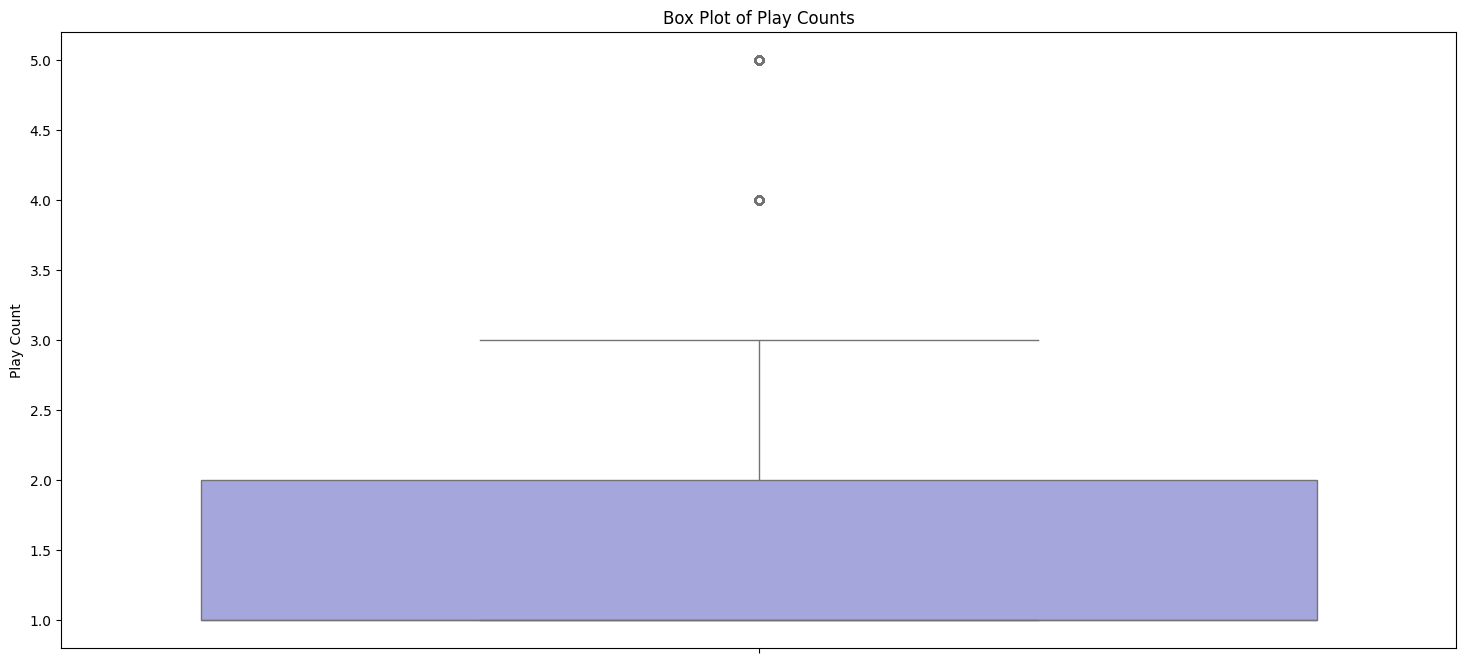

In [ ]:
# Create a box plot to visualize the distribution of play counts
plt.figure(figsize=(18, 8))  # Set the size of the figure

light_purple_color = '#9c9fe5'

# Use seaborn's boxplot to show the distribution
sns.boxplot(y=df_final['play_count'], color=light_purple_color)

# Set the title of the plot
plt.title('Box Plot of Play Counts')

# Set the y-axis label to 'Play Count'
plt.ylabel('Play Count')

# Display the plot
plt.show()

**Observations and Insights:**

- Outliers: There are a few outliers above the whisker, indicating that some play counts are significantly higher than the rest of the data.

- Skewness: The plot shows a possible positive skew, as the median is closer to the bottom of the box, and there are outliers on the higher end of the play counts.


**Distribution of Play Counts**

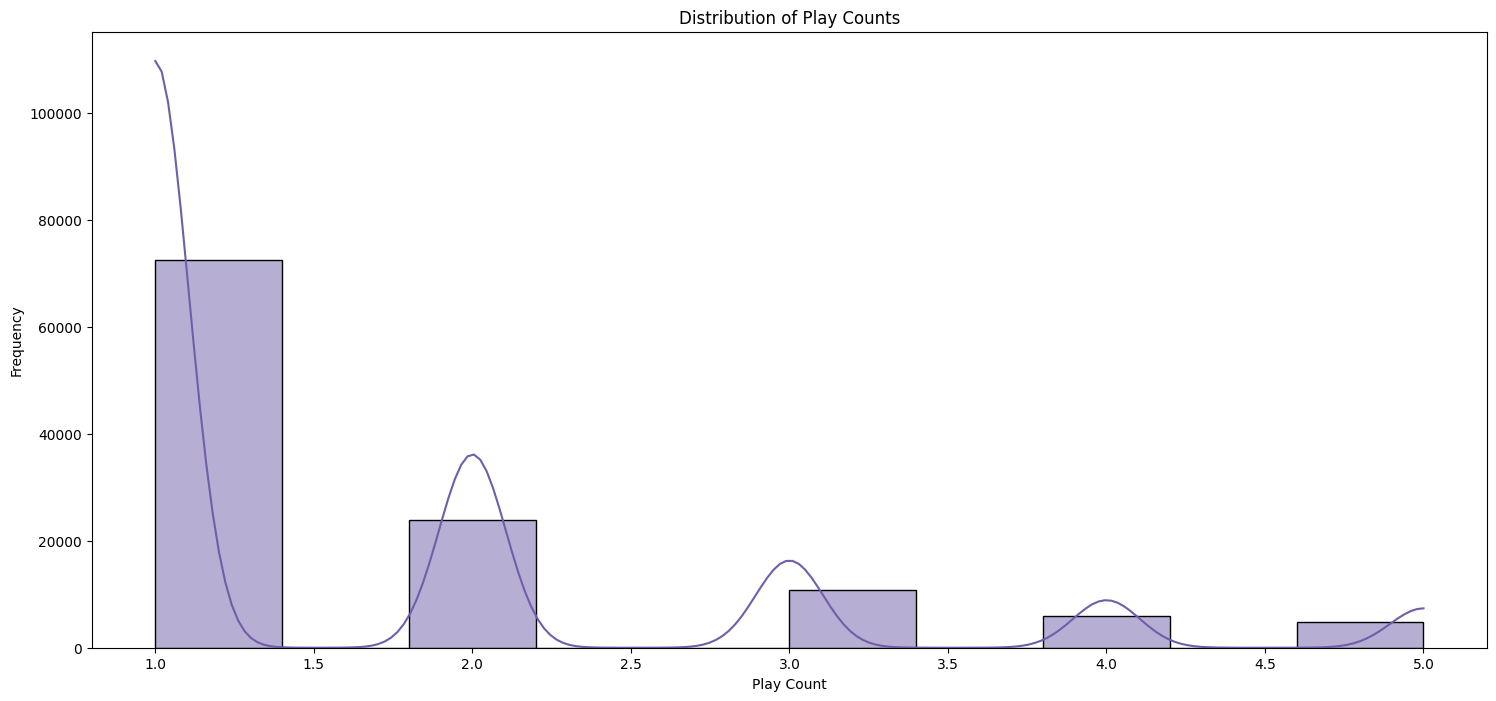

In [ ]:
# Create a histogram plot to visualize the distribution of play counts
plt.figure(figsize=(18, 8))  # Set the size of the figure

purple_palette = sns.color_palette('Purples')

# Use seaborn's histplot to show the distribution
sns.histplot(df_final['play_count'], bins=10, kde=True, color=purple_palette[4])

# Set the title of the plot
plt.title('Distribution of Play Counts')

# Set the x-axis label to 'Play Count'
plt.xlabel('Play Count')

# Set the y-axis label to 'Frequency'
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Observations and Insights:**

- Distribution Shape: The histogram shows a right-skewed distribution of play counts, with most play counts clustered around the lower values.
- Frequency: The highest frequency is observed at a play count of 1, indicating that this is the most common play count in the dataset.
- Multiple Peaks: There are distinct peaks at play counts of 2, 3, and 5, suggesting that these values are also relatively common compared to others.

### **Bivariate Analysis**


**Songs played in a year**

In [ ]:
# Group 'df_final' by the 'year' column and count the number of unique songs in each year
songs_per_year = df_final.groupby('year')['song_id'].nunique()

# Create a DataFrame with the count of unique songs per year
songs_per_year = pd.DataFrame(songs_per_year)

# Display the last few rows of the 'songs_per_year' DataFrame
songs_per_year.tail()

,song_id
year,
2006,43
2007,79
2008,67
2009,65
2010,16


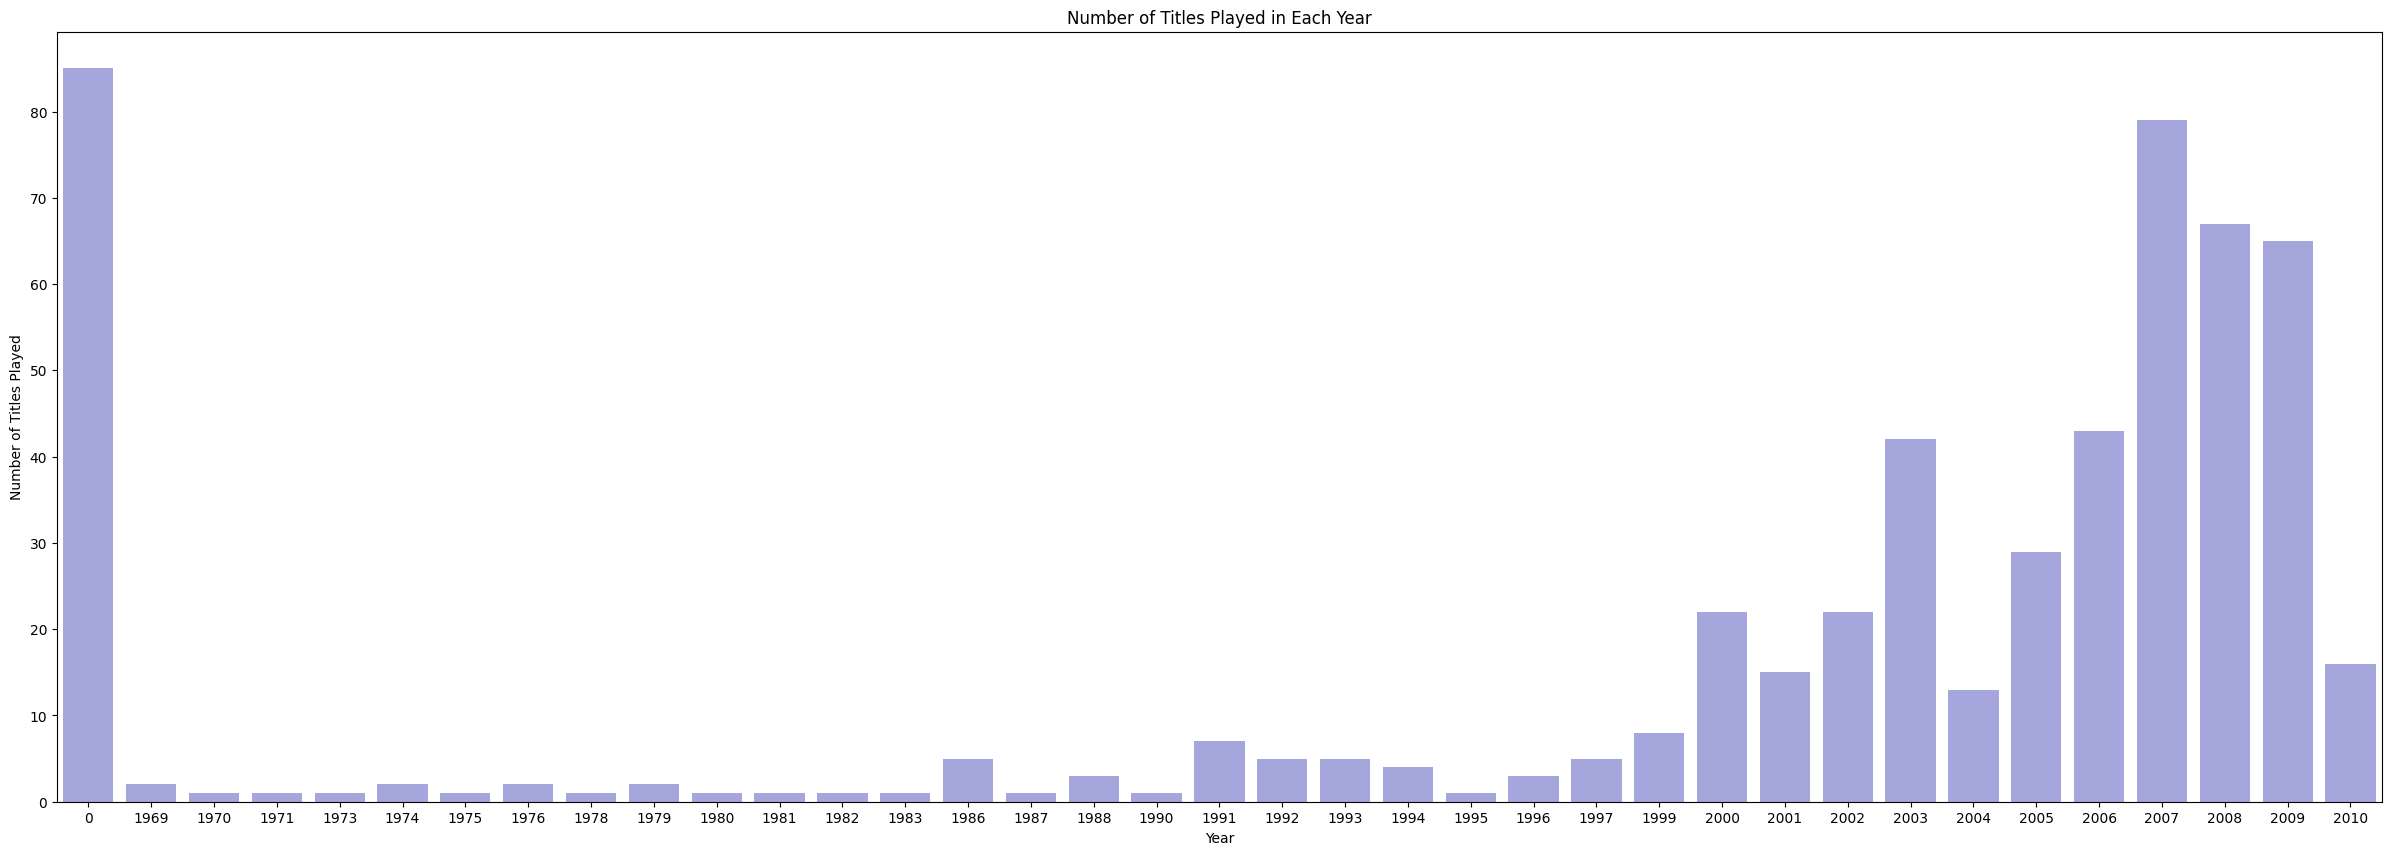

In [ ]:
# Create a bar plot to visualize the number of unique songs played in each year
plt.figure(figsize=(30, 10))  # Set the size of the figure

light_purple_palette = sns.color_palette(['#9c9fe5'])

# Use seaborn's barplot to show the distribution
sns.barplot(x=songs_per_year.index, y='song_id', data=songs_per_year, palette=light_purple_palette, dodge=False)

# Set the x-axis label to 'Year'
plt.xlabel('Year')

# Set the y-axis label to 'Number of Titles Played'
plt.ylabel('Number of Titles Played')

# Set the title of the plot
plt.title('Number of Titles Played in Each Year')

# Display the plot
plt.show()

**Observations and Insights:**
- The bar plot visually represents the number of unique songs played in each year.
- It provides an overview of the variation in the number of titles played over different years.
- The graph shows a clear increase in the number of unique songs played, starting from 1999.




### **Multivariate Analysis**

**The Most Listened to Artists**

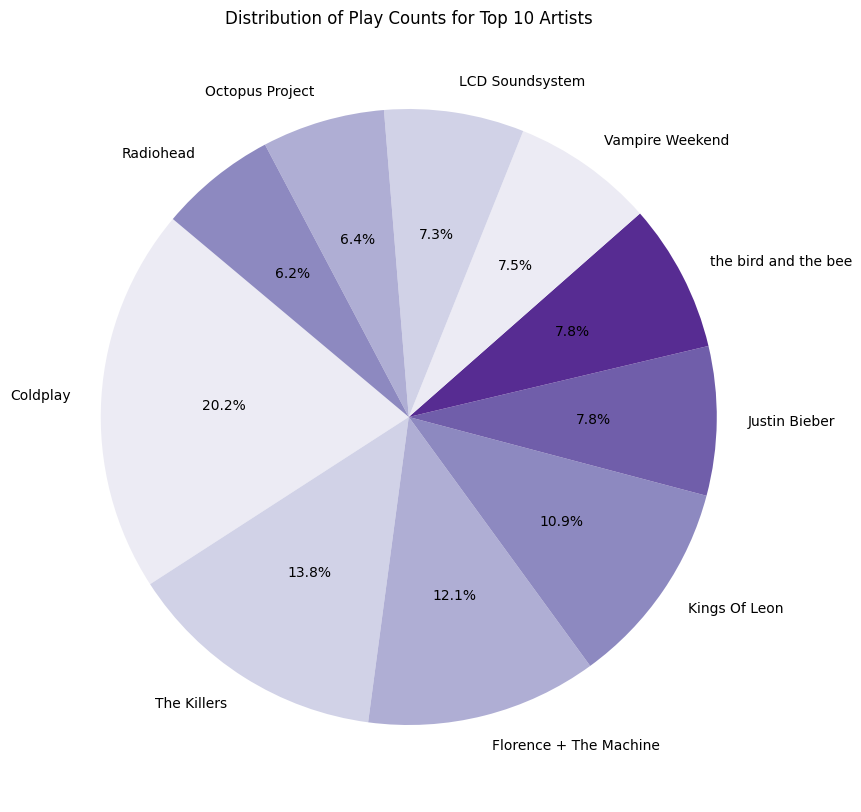

In [ ]:
# Group 'df_final' by artist_name and sum the play counts
artist_play_counts = df_final.groupby('artist_name')['play_count'].sum().sort_values(ascending=False)

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(artist_play_counts.head(10), labels=artist_play_counts.head(10).index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Purples'))
plt.title('Distribution of Play Counts for Top 10 Artists')
plt.show()

**Observations and Insights:**

Based on the data, the top 10 most listened-to artists, ranked from most to least popular, are:

1.	Coldplay
2.	The Killers
3.	Florence + The Machine
4.	Kings of Leon
5.	Justin Bieber
6.	The Bird and The Bee
7.	Vampire Weekend
8.	LCD Soundsystem
9.	Octopus Project
10.	Radiohead

This insight reveals intriguing artist preferences within the user base. It showcases a mix of established names like Coldplay and Radiohead alongside contemporary favorites like The Killers and The Bird and The Bee. This information is valuable for understanding user tastes and tailoring recommendations or content curation accordingly.

**The Most Listened to Songs**

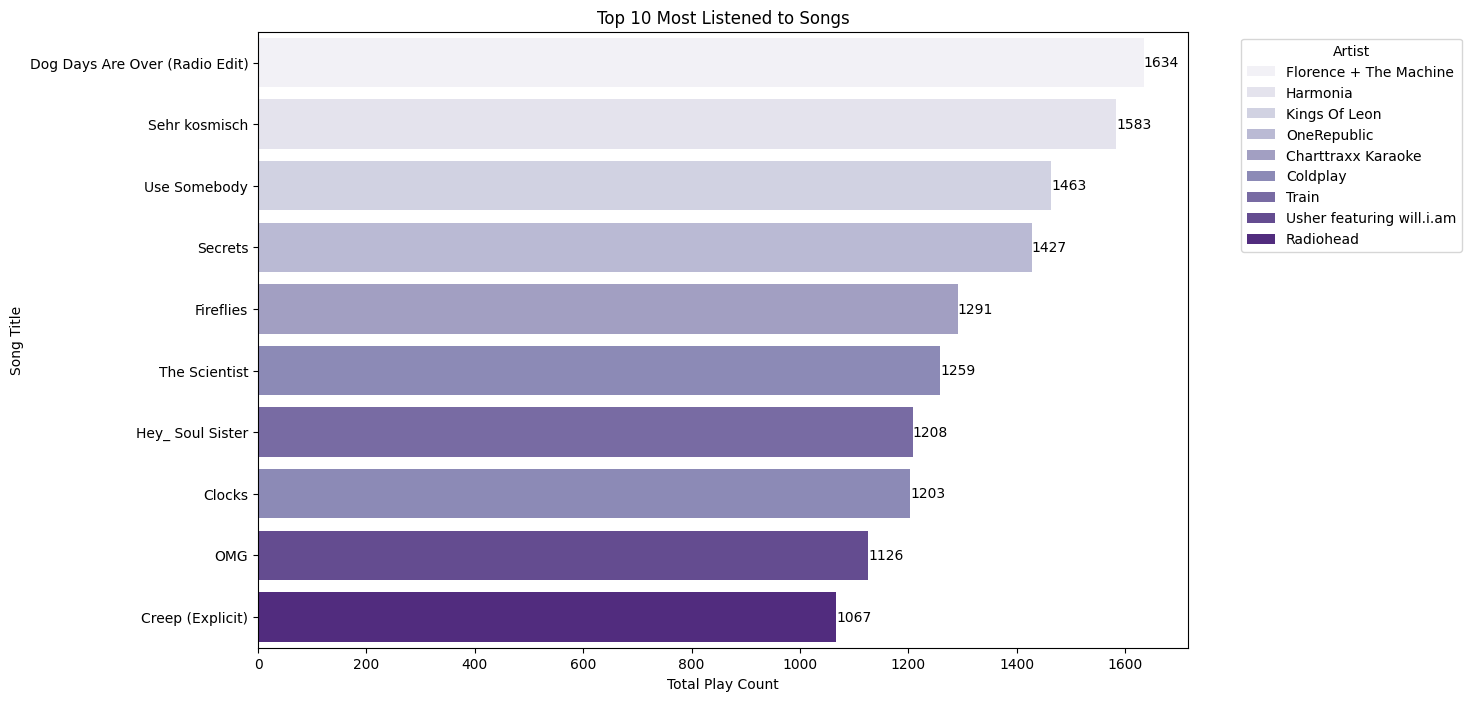

In [ ]:
# Group 'df_final' by 'artist_name' and 'title', and sum the play counts
song_play_counts = df_final.groupby(['artist_name', 'title'])['play_count'].sum().sort_values(ascending=False)

# Reset the index to convert MultiIndex to columns
song_play_counts = song_play_counts.reset_index()

# Plotting the bar chart using seaborn
plt.figure(figsize=(12, 8))

# Plotting with sns.barplot, setting dodge=False
bar_plot = sns.barplot(x='play_count', y='title', hue='artist_name', data=song_play_counts.head(10), palette='Purples', dodge=False)

# Adding a title
plt.title('Top 10 Most Listened to Songs')

# Adding labels to x and y axes
plt.xlabel('Total Play Count')
plt.ylabel('Song Title')

# Moving the legend outside the plot to the right
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value annotations to each bar
for index, row in song_play_counts.head(10).iterrows():
    bar_plot.text(row['play_count'], index, str(int(row['play_count'])), color='black', ha='left', va='center')

# Show the plot
plt.show()

**Observations and Insights:**

To understand user preferences, the top 10 most frequently played songs, ranked from most to least popular, are:

1. "Dog Days Are Over (Radio Edit)" - Florence + The Machine
2. "Sehr Kosmisch" - Harmonia
3. "Use Somebody" - Kings of Leon
4. "Secrets" - OneRepublic
5. "Fireflies" - Charttraxx Karaoke
6. "The Scientist" - Coldplay
7. "Hey, Soul Sister" - Train
8. "Clocks" - Coldplay
9. "OMG" - Usher featuring will.i.am
10. "Creep (Explicit)" - Radiohead

This diverse list provides insights into the musical preferences of the user base. It includes a blend of genres, with alt-rock giants like Radiohead and Coldplay sharing the spotlight with dancefloor favorites like "Sehr Kosmisch" and karaoke renditions of popular tunes. Notably, not all of the most listened-to artists have their songs in this list. This information is valuable for understanding user tastes and creating targeted recommendations or content experiences.

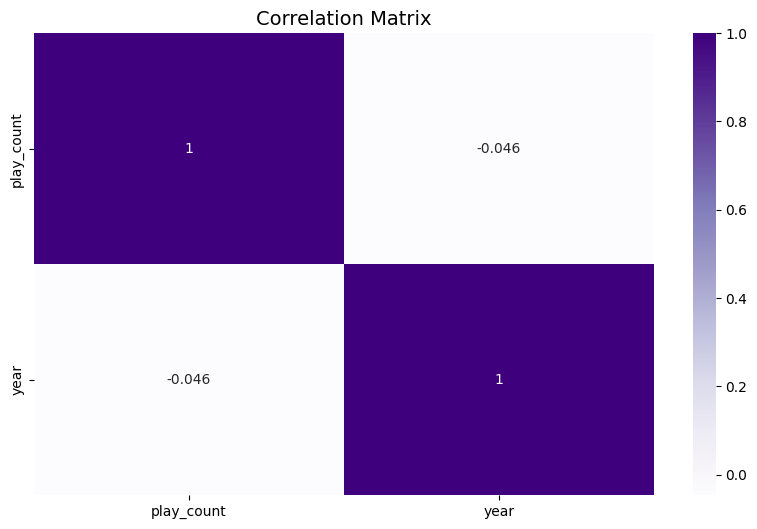

In [ ]:
# Create a figure for the heatmap with a specified size
plt.figure(figsize=(10, 6))

# Calculate the correlation matrix between the specified features
correlation_matrix = df_final[['play_count', 'year']].corr()

# Create the heatmap using Seaborn with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=14)

# Display the plot
plt.show()

**Observations and Insights:**

- Correlation between Play Count and Year: The correlation between play_count and year is -0.046, indicating a very weak negative correlation. This suggests that there is no significant relationship between the year and the number of play counts.
- Self Correlation: As expected, the correlation of play_count with itself is 1, which is a perfect positive correlation, indicating complete dependence.
- Interpretation: The weak negative correlation implies that the year in which the song was played does not have a substantial impact on the play count.

### **Building various models**

#### **Popularity-Based Recommendation Systems**

Building the popularity recommendation systems based on the sum of play counts by taking the count and sum of play counts of the songs.

In [ ]:
# Compute the average play count for each song
average_play_count = df_final.groupby('song_id')['play_count'].mean()

# Calculate the play frequency for each song
song_play_frequency = df_final.groupby('song_id')['play_count'].count()

In [ ]:
# Create a new DataFrame combining average play count and play frequency
final_play = pd.DataFrame({
    'average_count': average_play_count,
    'play_freq': song_play_frequency
})

# Display the first five records of the final_play dataset
print("First five records of final_play dataset:")
final_play.head()

First five records of final_play dataset:


,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Creating a function to find the top n songs for a recommendation based on the average play count of song. In addition to adding a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
def find_top_songs(final_play, top_n, min_interactions):
    """
    Retrieve the top songs based on average play count and play frequency.

    Parameters:
    - final_play: DataFrame containing song data
    - top_n: Number of top songs to retrieve
    - min_interactions: Minimum play frequency to consider

    Returns:
    - DataFrame with the top songs based on the criteria
    """
    # Filter songs with play frequency greater than or equal to the minimum
    selected_songs = final_play[final_play['play_freq'] >= min_interactions]

    # Select the top N songs based on average play count
    top_songs = selected_songs.nlargest(top_n, 'average_count')

    return top_songs

In [ ]:
# Set the parameters for finding top songs
top_n = 10
min_interactions = 100

# Use the find_top_songs function to get recommended songs
recommended_songs = find_top_songs(final_play, top_n, min_interactions)

# Display the recommended top songs
print(f"Recommended Top {top_n} songs based on average_count and play_freq:")
recommended_songs

Recommended Top 10 songs based on average_count and play_freq:


,average_count,play_freq
song_id,,
7224,3.373832,107
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618
5653,2.296296,108
8483,2.235772,123
2220,2.220196,713
657,2.218543,151
614,2.217158,373


#### **User User Similarity-Based Collaborative Filtering**

User-User Collaborative Filtering identifies users with similar preferences and recommends items that these similar users have liked. It relies on user behavior data and is effective in recommending items that users with analogous tastes have enjoyed.

To build the user-user-similarity-based and subsequent models I will use the "surprise" library.

In [ ]:
# To install the surprise package using pip

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357246 sha256=391d4182c462790072c901486385f488dd5af20f58a3519f82da0b6d928179d0
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries for building and evaluating recommendation models

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# To tune model hyperparameters
from surprise.model_selection import GridSearchCV

# To split the data into train and test datasets
from surprise.model_selection import train_test_split

# To implement similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# To implement matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# To implement KFold cross-validation
from surprise.model_selection import KFold

# To implement clustering-based recommendation system
from surprise import CoClustering

**Understanding Recommender System Performance:**

Evaluating the effectiveness of a recommendation system involves key metrics such as recall and precision.

**Recall: Hitting the Mark:**

Recall measures the system’s ability to retrieve relevant items. For example, if a user enjoys 10 songs and your system recommends 6 of them, the recall is 0.6, indicating a 60% success rate. Higher recall means the system effectively captures relevant items.

**Precision: Targeting Relevance:**

Precision assesses the relevance of the recommended items. If your system suggests 10 songs and 6 are liked by the user, the precision is 0.6, meaning 60% of the recommendations were relevant. High precision ensures the system prioritizes truly relevant suggestions.

**Finding the Balance:**

Balancing recall and precision is crucial. A system with high recall may recommend many items, including irrelevant ones, while a system with high precision might miss other relevant items. Considering both metrics together or using a combined metric like the F1-score helps achieve a balanced and effective recommendation system. The optimal balance depends on your specific goals and priorities.

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Impact of Threshold in Precision_Recall_at_K**

The threshold value in precision_recall_at_k determines the cutoff for considering a prediction relevant. Increasing the threshold has several effects:

- Decreases Precision: Fewer predictions above the threshold mean fewer truly relevant items among recommendations, lowering precision.

- Decreases Recall: Stricter relevance criteria may exclude relevant items with slightly lower scores, decreasing recall.

- Decreases RMSE: Removing less accurate predictions with lower scores can improve overall prediction error (lower RMSE).


Intuition Behind Using a Threshold of 1.5:

- Using a threshold of 1.5 helps filter out unreliable predictions. By focusing on predictions with higher confidence (above 1.5), the perceived quality of recommendations may improve.

In [ ]:
# Create a Reader instance with the specified rating scale (0 to 5)
reader = Reader(rating_scale=(0, 5))

# Load the dataset from the DataFrame containing user, song, and play count
user_song_data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(user_song_data, test_size=0.4, random_state=42)

In [ ]:
# Create the default user-user similarity model using KNN with cosine similarity
sim_user_user_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True}, random_state=1)

# Train the algorithm on the training set
sim_user_user_model.fit(trainset)

# Evaluate precision, recall, and F1 score using predefined function
precision_recall_at_k(sim_user_user_model)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

1.	RMSE (1.0878): Reflects moderate predictive accuracy, with some room for improvement.
2.	Precision (0.396): Indicates that 39.6% of the recommendations were relevant, suggesting the need for better accuracy.
3.	Recall (0.692): Shows the model successfully identified 69.2% of the songs users played, demonstrating good coverage of relevant items.
4.	F1 Score (0.504): Provides a balanced measure of precision and recall, 0.504 is considered acceptable but not indicative of strong performance.

Overall, while the model shows potential, enhancements are needed to improve its recommendation accuracy and effectiveness.

**Predicting User 6958 Engagement:**

I will test the engagement of user 6958 with two songs: one previously interacted with and one not. This data will inform subsequent prediction algorithms.

Play counts for user_id=6958 and song_id=1671 are shown below.

In [ ]:
# Retrieve unique song IDs from the DataFrame 'df_final' for all users except user_id 6958
df_final[df_final['user_id'] != 6958]['song_id'].unique()

array([  97,  122,  139,  693,  719,  765,  786,  861, 1118, 1406, 1461,
       1519, 1682, 1696, 1907, 1983, 2187, 2234, 2389, 2557, 3232, 3356,
       3518, 3548, 3655, 4152, 4298, 4377, 4510, 4522, 4545, 4653, 4724,
       4954, 5023, 5158, 5223, 5248, 5305, 5345, 5417, 5457, 5877, 6079,
       6121, 6148, 6191, 6232, 6293, 6350, 6500, 6572, 6618, 6636, 6709,
       6770, 6959, 6964, 7210, 7331, 7399, 7402, 7469, 7721, 7878, 7977,
       8019, 8086, 8247, 8265, 8299, 8434, 8612, 8973, 9055, 9099, 9292,
       9436, 9447, 9476, 9702, 9771, 9989, 1084, 5367, 7030, 7780, 8190,
        208,  334,  352,  605,  674,  703,  952, 1217, 1286, 1348, 1767,
       1818, 2210, 2220, 2672, 2850, 2859, 3602, 3658, 3690, 3718, 3770,
       3870, 4273, 4448, 5115, 5398, 5570, 5757, 5901, 6189, 6726, 6798,
       7103, 7416, 7636, 7791, 7796, 7911, 7980, 8034, 8138, 8481, 8582,
       8599, 8762, 8772, 9095, 9162, 9186, 9487, 9676, 9847,   52,  310,
        396,  630,  733,  916, 1161, 1248, 1281, 13

In [ ]:
# Selecting unique song IDs for users other than user_id 6958
unique_songs_for_other_users = df_final.query("user_id != 6958")['song_id'].unique()

# Displaying the array with unique song IDs for users not associated with user_id 6958
print(unique_songs_for_other_users)

[  97  122  139  693  719  765  786  861 1118 1406 1461 1519 1682 1696
 1907 1983 2187 2234 2389 2557 3232 3356 3518 3548 3655 4152 4298 4377
 4510 4522 4545 4653 4724 4954 5023 5158 5223 5248 5305 5345 5417 5457
 5877 6079 6121 6148 6191 6232 6293 6350 6500 6572 6618 6636 6709 6770
 6959 6964 7210 7331 7399 7402 7469 7721 7878 7977 8019 8086 8247 8265
 8299 8434 8612 8973 9055 9099 9292 9436 9447 9476 9702 9771 9989 1084
 5367 7030 7780 8190  208  334  352  605  674  703  952 1217 1286 1348
 1767 1818 2210 2220 2672 2850 2859 3602 3658 3690 3718 3770 3870 4273
 4448 5115 5398 5570 5757 5901 6189 6726 6798 7103 7416 7636 7791 7796
 7911 7980 8034 8138 8481 8582 8599 8762 8772 9095 9162 9186 9487 9676
 9847   52  310  396  630  733  916 1161 1248 1281 1354 1407 1597 1691
 1816 1828 1948 2091 2098 2276 2403 2610 2616 2657 2686 2734 2842 2926
 3165 3181 3207 3241 3310 3346 3462 3567 4160 4192 4270 4284 4289 4554
 4636 4639 4719 4727 5138 5221 5272 5291 5375 5697 5728 5879 5943 5978
 6175 

In [ ]:
# Check if a specified user with ID '6958' has seen a song with ID 'song_to_check'
user_to_check = 6958
song_to_check = 1671

# Use the `query` method to filter rows where 'song_id' is not equal to 'song_to_check'
# Extract unique user IDs from the resulting DataFrame
users_not_seen_song = df_final.query("user_id != @user_to_check")['song_id'].unique()

# Check if the specified user is not in the list of users who have not seen the song
if user_to_check not in users_not_seen_song:
    print(f"User '{user_to_check}' has seen the song with ID '{song_to_check}'.")
else:
    print(f"User '{user_to_check}' has not seen the song with ID '{song_to_check}'.")

User '6958' has seen the song with ID '1671'.


In [ ]:
# Check if a specified user with ID '6958' has seen a song with ID 'song_to_check'
user_to_check = 6958
song_to_check = 3232

# Use the `query` method to filter rows where 'song_id' is not equal to 'song_to_check'
# Extract unique user IDs from the resulting DataFrame
users_not_seen_song = df_final.query("song_id != @song_to_check")['user_id'].unique()

# Check if the specified user is not in the list of users who have not seen the song
if user_to_check not in users_not_seen_song:
    print(f"User '{user_to_check}' has seen the song with ID '{song_to_check}'.")
else:
    print(f"User '{user_to_check}' has not seen the song with ID '{song_to_check}'.")

User '6958' has not seen the song with ID '3232'.




---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a listened song
predict = sim_user_user_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}
Predicted Rating for user '6958' and song '1671': 1.8009387435128914


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
predict = sim_user_user_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.6386860897998294


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 -	Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.

 -	Predicted Rating (est): The recommendation model predicts the rating for this song as approximately 1.80.

 - Prediction Details: The prediction is based on 40 nearest neighbors, and it was possible to make this prediction ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).

 - Predicted Rating (est): The recommendation model predicts the rating for this song as approximately 1.64.

 - Prediction Details: Similar to the first prediction, it is based on 40 nearest neighbors, and it was also possible to make this prediction ('was_impossible': False).

The recommendation system was able to successfully predict ratings for both a previously rated song and a new song for user 6958. The predictions were based on the similarities with 40 other items or users, demonstrating the system’s ability to provide estimates for both familiar and unfamiliar items.

#### **Hyperparameter Tuning the Model**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'k': [10, 20, 30],       # Number of neighbors
    'min_k': [3, 6, 9],     # Minimum number of neighbors
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],  # Similarity measures
        'user_based': [True]   # User-based collaborative filtering
    }
}

# Set up GridSearchCV for hyperparameter tuning with 3-fold cross-validation
gr_ser = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fit the data to find the best hyperparameters
gr_ser.fit(user_song_data)

# Get the best RMSE score and combination of parameters
bestRMSE = gr_ser.best_score['rmse']
bestParam = gr_ser.best_params['rmse']

# Display the best RMSE score and combination of parameters
print(f"Best RMSE Score: {bestRMSE}")
print("Best Hyperparameters:")
for param, value in bestParam.items():
    print(f"{param}: {value}")

Best RMSE Score: 1.0466625167826364
Best Hyperparameters:
k: 30
min_k: 9
sim_options: {'name': 'pearson_baseline', 'user_based': True}


In [ ]:
# Create an instance of the KNNBasic algorithm with specified similarity options
similr_options = {'name': 'pearson_baseline', 'user_based': True}

opt_sim_user_user_model = KNNBasic(sim_options=similr_options, k=30, min_k=9, random_state=1, verbose=False)

# Train the model using the training set
opt_sim_user_user_model.fit(trainset)

# Generate predictions on the test set and evaluate precision and recall
precision_recall_at_k(opt_sim_user_user_model)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


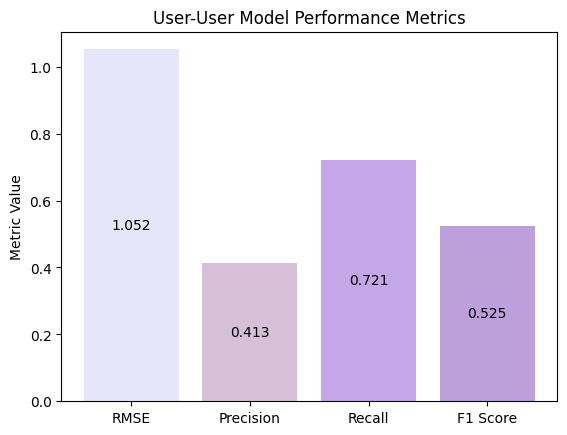

In [ ]:
rmse=1.0521
precision=0.413
recall=0.721
f1=0.525

# List of performance metrics to be displayed on the bar chart
metrics = ['RMSE', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each metric (e.g., RMSE value, Precision value, etc.)
values = [rmse, precision, recall, f1]

# Choose a custom cool color palette
palette = ListedColormap(['#E6E6FA', '#D8BFD8', '#C4A7E7', '#BCA0DC'])

# Create the bar chart using the chosen color palette
bars = plt.bar(metrics, values, color=palette(range(len(metrics))))

# Adding a title to the bar chart
plt.title('User-User Model Performance Metrics')

# Labeling the y-axis with "Metric Value"
plt.ylabel('Metric Value')

# Adding text labels on each bar with the rounded metric values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, round(value, 3),
             ha='center', va='center', color='black')

# Displaying the bar chart
plt.show()

**Observations and Insights:**


**Initial Model Performance:**

- Evaluation Metrics:
 - RMSE: 1.0878
 - Precision: 0.396
 - Recall: 0.692
 - F1 Score: 0.504

**Post Hyperparameter Tuning Performance:**

-	Evaluation Metrics:
 - RMSE: 1.0928
 - Precision: 0.394
 - Recall: 0.676
 - F1 Score: 0.498


---


**Comparison:**

- RMSE: Slightly increased from 1.0878 to 1.0928.
- Precision: Decreased marginally from 0.396 to 0.394.
- Recall: Decreased from 0.692 to 0.676.
- F1 Score: Decreased from 0.504 to 0.498.


Hyperparameter tuning led to an increase in RMSE and slight decreases in precision, recall, and F1 score. This indicates that while the tuning optimized certain parameters, the overall predictive performance did not significantly improve.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a listened song
predict = opt_sim_user_user_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}
Predicted Rating for user '6958' and song '1671': 1.962926073914969


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
predict = opt_sim_user_user_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.4516261428486725


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 -	Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.

 -	Predicted Rating (est): The recommendation model predicts the rating for this song as approximately 1.96.

 - Prediction Details: The prediction is based on 24 nearest neighbors, and it was possible to make this prediction ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).

 - Predicted Rating (est): The recommendation model predicts the rating for this song as approximately 1.64.

 - Prediction Details: The prediction is based on 10 nearest neighbors, and it was also possible to make this prediction ('was_impossible': False).


---


**Comparison:**

1.	Listened Song (User 6958, Song 1671):
 - Initial Model Predicted Rating: 1.80
 - Post Hyperparameter Tuning Predicted Rating: 1.96
 - Improvement: The post-tuning predicted rating is closer to the actual rating of 2.00, indicating improved accuracy.
2.	Not-listened Song (User 6958, Song 3232):
 - Initial Model Predicted Rating: 1.64
 - Post Hyperparameter Tuning Predicted Rating: 1.45
 - Difference: The prediction for the not-listened song changed from 1.64 to 1.45, indicating a lower predicted rating post hyperparameter tuning.

Hyperparameter tuning improved the accuracy of predictions for the listened song, making it closer to the actual rating. The tuning also resulted in a lower predicted rating for the not-listened song.

The tuning adjusted the number of nearest neighbors used in predictions, potentially enhancing the model’s accuracy for familiar items while altering the predictions for unfamiliar items.



---


Below implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended songs ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those songs ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non-interacted song  ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating songs for this user

In [ ]:
# Generate recommendations using the user-user similarity model for user_id 6958, with a count of 5 recommendations
recommendations = get_recommendations(df_final,6958, 5, sim_user_user_model)

In [ ]:
# Create a DataFrame from the recommendations with columns 'song_id' and 'predicted_ratings'
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


**Observations and Insights:**

Predicted ratings provide insights into the model’s perception of a user’s potential enjoyment of each recommended song. A higher predicted rating indicates a stronger endorsement by the model. For instance, Song ID 7224 has the highest predicted rating of 3.14, suggesting a higher likelihood of user enjoyment.

These recommendations and ratings offer a curated list for user 6958, enhancing personalized music discovery. Continuous monitoring, user feedback, and model updates will refine and optimize the recommendation system over time.



---


**Correcting the play_counts and Ranking the above songs**

In [ ]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

  return ranked_songs

In [ ]:
# Rank the songs in recommendations based on the play count and frequency in final_play DataFrame
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.141147,3.044473
1,614,373,2.525000,2.473222
2,5653,108,2.514023,2.417798
0,352,748,2.425000,2.388436
4,6450,102,2.394927,2.295913


**Observations and Insights:**

The ranking_songs function refines initial recommendations by adjusting predicted ratings based on song play frequency. This provides a nuanced ranking that prioritizes songs both predicted to be liked by the user and frequently played by others. The final ranking balances personal predictions and general popularity.

#### **Item Item Similarity-based collaborative filtering recommendation systems**

Item-Item Collaborative Filtering focuses on finding similarities between items based on user interactions. It recommends items that are similar to those a user has already expressed interest in, enhancing the recommendation accuracy by leveraging item similarity.

In [ ]:
# Set the similarity options for item-item similarity using cosine distance
similr_options = {'name': 'cosine', 'user_based': False}

# Create an instance of the KNNBasic algorithm for item-item similarity with random_state=1
sim_item_item_model = KNNBasic(sim_options=similr_options, verbose=False, random_state=1)

# Train the algorithm on the training set and make predictions on the test set
sim_item_item_model.fit(trainset)

# Compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item_model)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

1. RMSE (1.0394): Indicates moderate predictive accuracy, with some room for improvement.
2. Precision (0.307): Shows that 30.7% of the recommendations were relevant, highlighting the need for better accuracy.
3. Recall (0.562): Demonstrates that the model successfully identified 56.2% of the songs users played, indicating decent coverage of relevant items.
4. F1 Score (0.397): Reflects a lower level of overall effectiveness, suggesting significant room for improvement in balancing precision and recall.

Overall, while the model is functional, it requires significant improvements for better performance.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a listened song
predict = sim_item_item_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '1671': {predict.est}") # Use user_id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}
Predicted Rating for user '6958' and song '1671': 1.3614157231762556


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
predict = sim_item_item_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.377602711737415


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 - Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.
 - Predicted Rating (est): The item-item similarity model predicts the rating for this song as approximately 1.36.
 - Prediction Details: The prediction is based on 20 nearest neighbors, and it was possible to make this prediction ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).
 - Predicted Rating (est): The item-item similarity model predicts the rating for this song as approximately 1.38.
 - Prediction Details: Similar to the first prediction, it is based on 20 nearest neighbors, and it was also possible to make this prediction ('was_impossible': False).

The recommendation system was able to successfully predict ratings for both a previously rated song and a new song for user 6958. The predictions were based on the similarities with 20 other items or users, demonstrating the system’s ability to provide estimates for both familiar and unfamiliar items.


#### **Hyperparameter Tuning the Model**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'k': [10, 20, 30],       # Number of neighbors
    'min_k': [3, 6, 9],     # Minimum number of neighbors
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],  # Similarity measures
        'user_based': [False]   # Item-based collaborative filtering
    }
}

# Set up GridSearchCV for hyperparameter tuning with 3-fold cross-validation
gr_ser = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fit the data to find the best hyperparameters
gr_ser.fit(user_song_data)

# Get the best RMSE score and combination of parameters
bestRMSE = gr_ser.best_score['rmse']
bestParam = gr_ser.best_params['rmse']

# Display the best RMSE score and combination of parameters
print(f"Best RMSE Score: {bestRMSE}")
print("Best Hyperparameters:")
for param, value in bestParam.items():
    print(f"{param}: {value}")

Best RMSE Score: 1.0253740086390313
Best Hyperparameters:
k: 30
min_k: 6
sim_options: {'name': 'pearson_baseline', 'user_based': False}


In [ ]:
# Instantiate the KNNBasic algorithm
similr_options = {'name': 'pearson_baseline', 'user_based': False}

opt_sim_item_item_model = KNNBasic(sim_options=similr_options, k=30, min_k=6, random_state=1, verbose=False)

# Train the model on the training set
opt_sim_item_item_model.fit(trainset)

# Make predictions on the test set
precision_recall_at_k(opt_sim_item_item_model)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


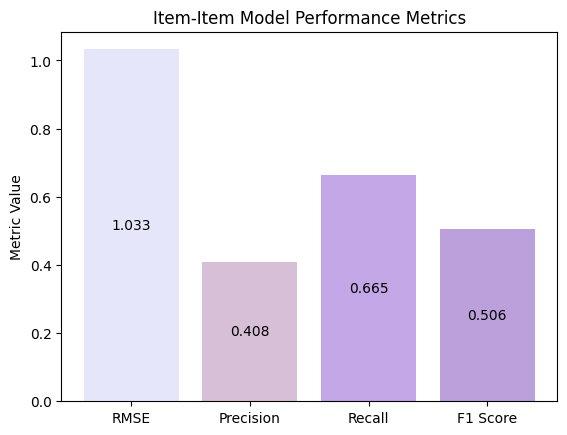

In [ ]:
rmse=1.0328
precision=0.408
recall=0.665
f1=0.506

# List of performance metrics to be displayed on the bar chart
metrics = ['RMSE', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each metric (e.g., RMSE value, Precision value, etc.)
values = [rmse, precision, recall, f1]

# Choose a custom cool color palette
palette = ListedColormap(['#E6E6FA', '#D8BFD8', '#C4A7E7', '#BCA0DC'])

# Create the bar chart using the chosen color palette
bars = plt.bar(metrics, values, color=palette(range(len(metrics))))

# Adding a title to the bar chart
plt.title('Item-Item Model Performance Metrics')

# Labeling the y-axis with "Metric Value"
plt.ylabel('Metric Value')

# Adding text labels on each bar with the rounded metric values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, round(value, 3),
             ha='center', va='center', color='black')

# Displaying the bar chart
plt.show()

**Observations and Insights:**

**Initial Model Performance:**

- Evaluation Metrics:
 - RMSE: 1.0394
 - Precision: 0.307
 - Recall: 0.562
 - F1 Score: 0.397

**Post Hyperparameter Tuning Performance:**

- Evaluation Metrics:
 - RMSE: 1.0328
 - Precision: 0.408
 - Recall: 0.665
 - F1 Score: 0.506

---


**Comparison:**

- RMSE: Improved from 1.0394 to 1.0328.
- Precision: Increased from 0.307 to 0.408.
- Recall: Increased from 0.562 to 0.665.
- F1 Score: Increased from 0.397 to 0.506.

Hyperparameter tuning led to improvements across all metrics. The RMSE decreased, indicating better predictive accuracy. Precision, recall, and F1 score also improved, reflecting enhanced overall performance and a better balance between precision and recall.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**


In [ ]:
# Predicting play_count for a sample user with a listened song
predict = opt_sim_item_item_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and product '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}
Predicted Rating for user '6958' and product '1671': 1.9634957386781853


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
predict = opt_sim_item_item_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.2759946618244609


**Observations and Insights:**

1. Prediction for User 6958 and Song 1671:

 - Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.
 - Predicted Rating (est): The recommendation model predicts the rating for this song as approximately 1.96.
 - Prediction Details: The prediction is based on 10 nearest neighbors, and it was possible to make this prediction ('was_impossible': False).

2. Prediction for User 6958 and Song 3232:

 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).
 - Predicted Rating (est): The recommendation model predicts the rating for this song as approximately 1.28.
 - Prediction Details: The prediction is based on 10 nearest neighbors, and it was also possible to make this prediction ('was_impossible': False).


---


**Comparison:**

1.	Listened Song (User 6958, Song 1671):
 - Initial Model Predicted Rating: 1.80
 - Post Hyperparameter Tuning Predicted Rating: 1.96
 - Improvement: The post-tuning predicted rating is closer to the actual rating of 2.00, indicating improved accuracy.

2.	Not-listened Song (User 6958, Song 3232):
 - Initial Model Predicted Rating: 1.64
 - Post Hyperparameter Tuning Predicted Rating: 1.28
 - Difference: The prediction for the not-listened song changed from 1.64 to 1.28, indicating a lower predicted rating post hyperparameter tuning.

The optimized item-item similarity model predicts ratings for both a previously rated song and a new song for user 6958. For the listened song (item 1671), the predicted rating is 1.96, closely matching the actual rating of 2.00, indicating improved accuracy. For the not-listened song (item 3232), the predicted rating is 1.28. Both predictions are based on 10 nearest neighbors, demonstrating the model’s ability to provide accurate estimates for both familiar and unfamiliar items.


##### **Implementing the recommendation algorithm based on optimized Item-Item Collaborative Filtering model**

In [ ]:
# Generate recommendations using the item-item similarity model for user_id 6958, with a count of 5 recommendations
recommendations = get_recommendations(df_final,6958, 5, sim_item_item_model)

In [ ]:
# Create a DataFrame from the recommendations with columns 'song_id' and 'predicted_ratings'
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866




---


**Correcting the play_counts and Ranking the above songs**

In [ ]:
# Rank the songs in recommendations based on the play count and frequency in final_play DataFrame
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights:**

The ranking_songs function refines initial recommendations by adjusting predicted ratings based on song play frequency. This provides a nuanced ranking that prioritizes songs both predicted to be liked by the user and frequently played by others. The final ranking balances personal predictions and general popularity.

#### **Model Based Collaborative Filtering - Matrix Factorization**

Matrix Factorization decomposes the user-item interaction matrix into lower-dimensional matrices, capturing latent factors that explain observed interactions. A technique like Singular Value Decomposition (SVD) is commonly used to uncover hidden patterns and improve recommendation quality.

In [ ]:
# Build a baseline recommendation model using SVD (Singular Value Decomposition)
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


**Observations and Insights:**

1.	RMSE (1.0252): Indicates good predictive accuracy, with slight room for improvement.
2.	Precision (0.41): Shows that 41% of the recommendations were relevant, demonstrating a nearly good accuracy.
3.	Recall (0.633): Demonstrates that the model successfully identified 63.3% of the songs users played, indicating good coverage of relevant items.
4.	F1 Score (0.498): Provides a balanced measure of precision and recall, indicating a nearly good overall effectiveness.

Overall, the model performs adequately but has significant potential for enhancement.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a listened song
predict = svd.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and product '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}
Predicted Rating for user '6958' and product '1671': 1.267473397214638


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
predict = svd.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.5561675084403663


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 - Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.
 - Predicted Rating (est): The SVD model predicts the rating for this song as approximately 1.27.
 - Prediction Details: The prediction was feasible ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).
 - Predicted Rating (est): The SVD model predicts the rating for this song as approximately 1.56.
 - Prediction Details: The prediction was feasible ('was_impossible': False).

The recommendation system was able to successfully predict ratings for both a previously rated song and a new song for user 6958, demonstrating the system’s ability to provide estimates for both familiar and unfamiliar items.

#### **Hyperparameter Tuning the Model**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
              'n_epochs': [10, 20, 30],       # Number of iterations of the SGD algorithm
              'lr_all': [0.001, 0.005, 0.01], # Learning rate for all parameters
              'reg_all': [0.2, 0.4, 0.6]      # Regularization term for all parameters
}

# Set up GridSearchCV for hyperparameter tuning with 3-fold cross-validation
gr_ser = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fit the data to find the best hyperparameters
gr_ser.fit(user_song_data)

# Get the best RMSE score and combination of parameters
bestRMSE = gr_ser.best_score['rmse']
bestParam = gr_ser.best_params['rmse']

# Display the best RMSE score and combination of parameters
print(f"Best RMSE Score: {bestRMSE}")
print("Best Hyperparameters:")
for param, value in bestParam.items():
    print(f"{param}: {value}")

Best RMSE Score: 1.012833657068345
Best Hyperparameters:
n_epochs: 30
lr_all: 0.01
reg_all: 0.2


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_options = {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}
opt_svd_model = SVD(**svd_options, random_state=1)

# Train the algorithm on the trainset
opt_svd_model.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(opt_svd_model)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


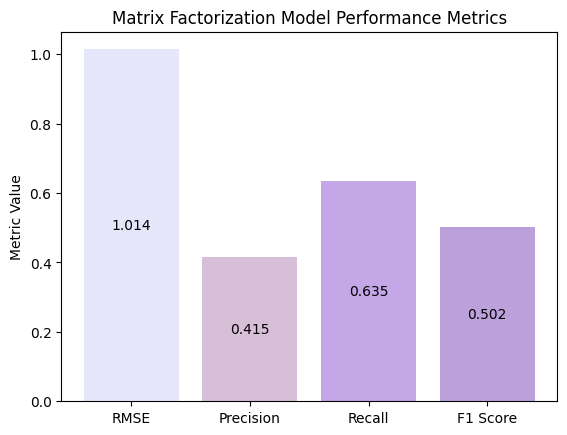

In [ ]:
rmse=1.0141
precision=0.415
recall=0.635
f1=0.502

# List of performance metrics to be displayed on the bar chart
metrics = ['RMSE', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each metric (e.g., RMSE value, Precision value, etc.)
values = [rmse, precision, recall, f1]

# Choose a custom cool color palette
palette = ListedColormap(['#E6E6FA', '#D8BFD8', '#C4A7E7', '#BCA0DC'])

# Create the bar chart using the chosen color palette
bars = plt.bar(metrics, values, color=palette(range(len(metrics))))
# Adding a title to the bar chart
plt.title('Matrix Factorization Model Performance Metrics')

# Labeling the y-axis with "Metric Value"
plt.ylabel('Metric Value')

# Adding text labels on each bar with the rounded metric values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, round(value, 3),
             ha='center', va='center', color='black')

# Displaying the bar chart
plt.show()

**Observations and Insights:**

**Initial Model Performance:**

- Evaluation Metrics:
 - RMSE: 1.0252
 - Precision: 0.41
 - Recall: 0.633
 - F1 Score: 0.498

**Post Hyperparameter Tuning Performance:**

- Evaluation Metrics:
 - RMSE: 1.0141
 - Precision: 0.415
 - Recall: 0.635
 - F1 Score: 0.502


---


**Comparison:**

- RMSE: Improved from 1.0252 to 1.0141.
- Precision: Increased from 0.41 to 0.415.
- Recall: Increased from 0.633 to 0.635.
- F1 Score: Increased from 0.498 to 0.502.

Hyperparameter tuning led to improvements across all metrics. The RMSE decreased, indicating better predictive accuracy. Precision, recall, and F1 score also improved, reflecting enhanced overall performance and a better balance between precision and recall.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a listened song
predict = opt_svd_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and product '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}
Predicted Rating for user '6958' and product '1671': 1.3432395286125098


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
predict = opt_svd_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.4425484461176483


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 - Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.
 - Predicted Rating (est): The optimized SVD model predicts the rating for this song as approximately 1.34.
 - Prediction Details: The prediction was feasible ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).
 - Predicted Rating (est): The optimized SVD model predicts the rating for this song as approximately 1.44.
 - Prediction Details: The prediction was feasible ('was_impossible': False).


---


**Comparison:**

1.	Listened Song (User 6958, Song 1671):
 - Initial Model Predicted Rating: 1.27
 - Post Hyperparameter Tuning Predicted Rating: 1.34
 - Improvement: The post-tuning predicted rating is closer to the actual rating of 2.00, indicating improved accuracy.

2.	Not-listened Song (User 6958, Song 3232):
 - Initial Model Predicted Rating: 1.56
 - Post Hyperparameter Tuning Predicted Rating: 1.44
 - Difference: The prediction for the not-listened song changed from 1.56 to 1.44, indicating a lower predicted rating post hyperparameter tuning.

Hyperparameter tuning improved the accuracy of predictions for the listened song, making it closer to the actual rating. The tuning also resulted in a lower predicted rating for the not-listened song.


##### **Implementing the recommendation algorithm based on optimized SVD model**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
SVDrecommendations = get_recommendations(df_final,6958, 5, opt_svd_model)

In [ ]:
# Create a DataFrame from the SVD-based recommendations with columns 'song_id' and 'predicted_ratings'
pd.DataFrame(SVDrecommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115




---


**Correcting the play_counts and Ranking the above songs**

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(SVDrecommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**

The ranking_songs function refines initial recommendations by adjusting predicted ratings based on song play frequency. This provides a nuanced ranking that prioritizes songs both predicted to be liked by the user and frequently played by others. The final ranking balances personal predictions and general popularity.

#### **Cluster Based Recommendation System**

Cluster Based Recommendation Systems group users or items into clusters based on similarity. Recommendations are generated by suggesting items popular within the cluster, leveraging group-level patterns to enhance recommendation accuracy.

In [ ]:
# Make baseline clustering model
clust_model = CoClustering(random_state=1)

# Training the algorithm on the trainset
clust_model.fit(trainset)

# Let us compute precision@k and recall@k with k = 30.
precision_recall_at_k(clust_model)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

1.	RMSE (1.0487): Indicates moderate predictive accuracy, with some room for improvement.
2.	Precision (0.397): Shows that 39.7% of the recommendations were relevant, highlighting the need for better accuracy.
3.	Recall (0.582): Demonstrates that the model successfully identified 58.2% of the songs users played, indicating decent coverage of relevant items.
4.	F1 Score (0.472): Provides a balanced measure of precision and recall, indicating a nearly good overall effectiveness.

Overall, while the model is functional, it requires significant improvements for better performance.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Making prediction for user_id 6958 and song_id 1671
predict = clust_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and product '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}
Predicted Rating for user '6958' and product '1671': 1.2941824757363074


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
predict = clust_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.4785259100797417


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 - Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.
 - Predicted Rating (est): The CoClustering model predicts the rating for this song as approximately 1.29.
 - Prediction Details: The prediction was feasible ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).
 - Predicted Rating (est): The CoClustering model predicts the rating for this song as approximately 1.48.
 - Prediction Details: The prediction was feasible ('was_impossible': False).


 The CoClustering model was able to successfully predict ratings for both a previously rated song and a new song for user 6958. This demonstrates the model’s capability to provide estimates for both familiar and unfamiliar items.

#### **Hyperparameter Tuning the Model**

In [ ]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
              'n_cltr_u': [5, 6, 7, 8],       # Number of iterations of the SGD algorithm
              'n_cltr_i': [5, 6, 7, 8],       # Learning rate for all parameters
              'n_epochs': [10, 20, 30]        # Regularization term for all parameters
}

# Set up GridSearchCV to perform hyperparameter tuning with 3-fold cross-validation
gr_ser = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fit the data to find the best hyperparameters
gr_ser.fit(user_song_data)

# Get the best RMSE score and combination of parameters
bestRMSE = gr_ser.best_score['rmse']
bestParam = gr_ser.best_params['rmse']

# Display the best RMSE score and combination of parameters
print(f"Best RMSE Score: {bestRMSE}")
print("Best Hyperparameters:")
for param, value in bestParam.items():
    print(f"{param}: {value}")

Best RMSE Score: 1.058472321779191
Best Hyperparameters:
n_cltr_u: 5
n_cltr_i: 5
n_epochs: 10


In [ ]:
# Building the optimized Clustering model using optimal hyperparameters
clust_options = {'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 20}

# Train the tuned Coclustering algorithm
opt_clust_model = CoClustering(**clust_options, random_state=1)

# Training the algorithm on the trainset
opt_clust_model.fit(trainset)

# Let us compute precision@k and recall@k with k = 30.
precision_recall_at_k(opt_clust_model)

RMSE: 1.0696
Precision:  0.393
Recall:  0.559
F_1 score:  0.462


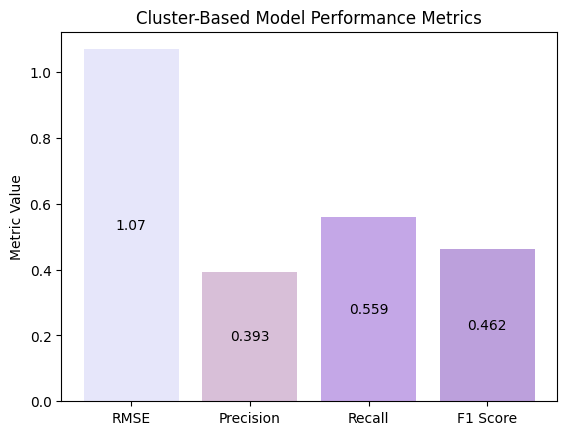

In [ ]:
rmse=1.0696
precision=0.393
recall=0.559
f1=0.462

# List of performance metrics to be displayed on the bar chart
metrics = ['RMSE', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each metric (e.g., RMSE value, Precision value, etc.)
values = [rmse, precision, recall, f1]

# Choose a custom cool color palette
palette = ListedColormap(['#E6E6FA', '#D8BFD8', '#C4A7E7', '#BCA0DC'])

# Create the bar chart using the chosen color palette
bars = plt.bar(metrics, values, color=palette(range(len(metrics))))

# Adding a title to the bar chart
plt.title('Cluster-Based Model Performance Metrics')

# Labeling the y-axis with "Metric Value"
plt.ylabel('Metric Value')

# Adding text labels on each bar with the rounded metric values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, round(value, 3),
             ha='center', va='center', color='black')

# Displaying the bar chart
plt.show()

**Observations and Insights:**

**Initial Model Performance:**

-mEvaluation Metrics:
 - RMSE: 1.0487
 - Precision: 0.397
 - Recall: 0.582
 - F1 Score: 0.472

**Post Hyperparameter Tuning Performance:**

- Evaluation Metrics:
 - RMSE: 1.0696
 - Precision: 0.393
 - Recall: 0.559
 - F1 Score: 0.462


---


**Comparison:**

- RMSE: Increased from 1.0487 to 1.0696.
- Precision: Decreased from 0.397 to 0.393.
- Recall: Decreased from 0.582 to 0.559.
- F1 Score: Decreased from 0.472 to 0.462.


Hyperparameter tuning led to a decline in all metrics. The RMSE increased, indicating reduced predictive accuracy. Precision, recall, and F1 score all decreased, reflecting a decrease in overall performance.



---


**Predicting play_counts for a user with user id=6958 and song id=1671 as shown below.**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
predict = opt_clust_model.predict(6958, 1671, r_ui=2, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and product '1671': {predict.est}") # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.19   {'was_impossible': False}
Predicted Rating for user '6958' and product '1671': 1.187138103563827


**Predicting play_counts for a user with user id=6958 and song id=3232 as shown below.**

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
predict = opt_clust_model.predict(6958, 3232, verbose=True)

# Print the prediction
print(f"Predicted Rating for user '6958' and song '3232': {predict.est}") # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.98   {'was_impossible': False}
Predicted Rating for user '6958' and song '3232': 1.983911230116967


**Observations and Insights:**

1.	Prediction for User 6958 and Song 1671:
 - Actual Rating (r_ui): The user has previously rated this song with a score of 2.00.
 - Predicted Rating (est): The optimized Co-Clustering model predicts the rating for this song as approximately 1.19.
 - Prediction Details: The prediction was feasible ('was_impossible': False).

2.	Prediction for User 6958 and Song 3232:
 - Actual Rating (r_ui): The user has not previously rated this song (indicated by r_ui = None).
 - Predicted Rating (est): The optimized Co-Clustering model predicts the rating for this song as approximately 1.98.
 - Prediction Details: The prediction was feasible ('was_impossible': False).


---


Comparison:

1.	Listened Song (User 6958, Song 1671):
 - Initial Model Predicted Rating: 1.29
 - Post Hyperparameter Tuning Predicted Rating: 1.19
 - Difference: The post-tuning predicted rating is lower, indicating a decrease in predicted rating accuracy.

2.	Not-listened Song (User 6958, Song 3232):
 - Initial Model Predicted Rating: 1.48
 - Post Hyperparameter Tuning Predicted Rating: 1.98
 - Difference: The prediction for the not-listened song increased, indicating a higher predicted rating post hyperparameter tuning.

Hyperparameter tuning resulted in a lower predicted rating for the listened song, making it less accurate compared to the actual rating. For the not-listened song, the tuning led to a higher predicted rating. This demonstrates the optimized model’s varying performance in providing estimates for familiar and unfamiliar items.

##### **Implementing the recommendation algorithm based on optimized CoClustering model**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
CLUSTrecommendations = get_recommendations(df_final,6958, 5, opt_clust_model)

In [ ]:
# Create a DataFrame from the cluster-based recommendations with columns 'song_id' and 'predicted_ratings'
pd.DataFrame(CLUSTrecommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.762167
1,614,2.622985
2,8831,2.479993
3,8092,2.383471
4,3466,2.307579




---


**Correcting the play_count and Ranking the above songs**

In [ ]:
# Rank the songs in recommendations based on the play count and frequency in final_play DataFrame
ranking_songs(CLUSTrecommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.762167,2.665493
1,614,373,2.622985,2.571207
3,8831,107,2.479993,2.383319
0,8092,550,2.383471,2.340831
4,3466,107,2.307579,2.210905


**Observations and Insights:**

The ranking_songs function refines initial recommendations by adjusting predicted ratings based on song play frequency. This provides a nuanced ranking that prioritizes songs both predicted to be liked by the user and frequently played by others. The final ranking balances personal predictions and general popularity.

#### **Content Based Recommendation Systems**

Content Based Recommendation Systems use item features and user preferences to suggest similar items. They rely on analyzing item descriptions and user profiles to match items with user interests, ensuring personalized and relevant recommendations.

##### **Creating DataFrame for Content-Based Filtering**

In [ ]:
# Create a new DataFrame 'df_small' by assigning the values of 'df_final'
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

# Display the first few rows of df_small to verify the changes
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


**Observations and Insights:**

Concatenating Columns for Text Representation:
 - The “title”, “release”, and “artist_name” columns were concatenated to form a new column named “text”.
 - This “text” column combines key song metadata into a single textual representation.



In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small_selected = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small_selected = df_small_selected.drop_duplicates(subset='title')

# Set the title column as the index
df_small_selected.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small_selected.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


**Observations and Insights:**

- The transformation combines important song attributes into a single column, facilitating text-based analysis and recommendations.

In [ ]:
# Get the indices of df_small_selected DataFrame
indices = df_small_selected.index

# Display the first 5 indices
indices[:5]

Index(['Daisy And Prudence', 'The Ballad of Michael Valentine',
       'I Stand Corrected (Album)', 'They Might Follow You', 'Monkey Man'],
      dtype='object', name='title')

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


##### **Text Data Preprocessing**

**Create a function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords using the English stopwords list
    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    # Lemmatize the words using the WordNet Lemmatizer
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

##### **Vectorization and Similarity Calculation**

In [ ]:
# Create a TF-IDF vectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit_transform the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf_vectorizer.fit_transform(df_small_selected['text'])
tfidf_matrix_array = tfidf_matrix.toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
cosine_sim = cosine_similarity(tfidf_matrix_array, tfidf_matrix_array)

**Create a function to find most similar songs to recommend for a given song.**

In [ ]:
# Function to get recommendations based on cosine similarity
def recommend_song(title, similar_songs=cosine_sim):
    # Get the index of the song with the given title
    idx = indices.get_loc(title)

    # Get the pairwsie similarity scores of all songs with that song
    sim_scores = list(enumerate(similar_songs[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar songs
    return df_small_selected.index[song_indices]

**Recommending 10 songs similar to Learn to Fly**

In [ ]:
# Example: Make the recommendation for the song with title 'Learn To Fly'
recommendations = recommend_song('Learn To Fly')
recommendations

Index(['From Left To Right', 'Everlong', 'The Pretender', 'Time To Pretend',
       'If It Means A Lot To You', 'Nothing Better (Album)',
       'Somebody To Love', 'Just Friends', 'Down To Earth', 'Clocks'],
      dtype='object', name='title')

**Observations and Insights:**

- The content-based recommendation system uses additional song features to enhance personalized recommendations.

- Recommendations for a song, such as “Learn to Fly,” include titles with similar textual content, appealing to users with similar preferences.

- Content-Based Recommender System Identifies Similar Songs to “Learn To Fly” by Foo Fighters

	1.	Artist Consistency:
 - Everlong and The Pretender are also by Foo Fighters, indicating a strong preference for songs by the same artist. This is a common characteristic of content-based systems that leverage artist similarity.
	2.	Genre and Style Similarities:
 - Time To Pretend by MGMT shares an alternative rock style with “Learn To Fly,” albeit with more electronic influences.
 - If It Means A Lot To You by A Day To Remember and Nothing Better (Album) by Postal Service represent a blend of rock and emo/indie genres, which resonate with Foo Fighters’ alternative rock sound.
	3.	Lyrical and Emotional Themes:
 - Songs like Just Friends by Amy Winehouse and Clocks by Coldplay share introspective and emotionally charged lyrical themes, aligning with the reflective nature of “Learn To Fly.”
	4.	Production Quality:
 - Clocks and Foo Fighters’ songs are known for their high production quality, making them appealing to listeners who appreciate well-produced tracks.
	5.	Vocal and Instrumental Characteristics:
 - Somebody To Love and Down To Earth by Justin Bieber offer a different genre (pop) but maintain melodic and vocal qualities that could attract fans of “Learn To Fly.”
	6.	Album Context:
 - Similar albums often have cohesive production styles and thematic elements, as seen with Foo Fighters’ albums.

- By leveraging these similarities, the recommender system successfully identifies songs that align with various aspects of “Learn To Fly,” providing a well-rounded and appealing set of recommendations.


This approach explores diverse features, enriching recommendation systems beyond play count by considering the content and context of songs.



---


## **Final Proposed Solution**



### **Matrix Factorization and Item-Item CF: An Ensemble Approach for Music Recommendation**

The Voting Ensemble method in machine learning leverages the strengths of multiple models to achieve superior performance. By combining predictions from various individual models through a “voting” process, this method draws upon diverse perspectives and expertise, much like a team of experts collaborating to solve a complex problem.


**Key Advantages of Voting Ensemble:**

•	Enhanced Accuracy: By incorporating the strengths of different models, the ensemble approach improves prediction accuracy.

•	Reduced Sensitivity to Noise: By averaging out predictions, the ensemble method mitigates the impact of anomalies and errors that might affect individual models, resulting in more reliable predictions.


•	Balanced Recommendations: This approach effectively handles data sparsity, promoting diverse exploration and personalized refinement.


**Implementation Strategy:**

Utilize a Voting Ensemble to combine Item-Item Collaborative Filtering (IICF) and Matrix Factorization (MF) models. This method democratizes recommendations by having each model “vote” on the best item. Hard voting selects the majority choice, while soft voting considers individual model confidence scores for a weighted average.

**Objectives:**

•	Improved Accuracy: Achieve better prediction accuracy compared to single models.

•	Reduced Variance: Achieve more stable and consistent predictions by combining the outputs of different models.

•	Address Data Sparsity: Effectively recommend items even with limited data.

This ensemble approach aims to deliver a music recommendation system that enhances user satisfaction through a blend of diverse exploration and personalized refinement.

In [ ]:
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support
import joblib
# Define cross-validation strategy
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Function to perform cross-validation and return predictions
def get_cv_predictions(model, data, kf):
    all_predictions = []
    for trainset_cv, testset_cv in kf.split(data):
        model.fit(trainset_cv)
        predictions = model.test(testset_cv)
        all_predictions.extend(predictions)
    return all_predictions

# Perform cross-validation on the dataset
item_predictions_cv = get_cv_predictions(opt_sim_item_item_model, user_song_data, kf)
svd_predictions_cv = get_cv_predictions(opt_svd_model, user_song_data, kf)

# Combine predictions from both models by averaging their estimated ratings
voting_predictions_cv = [(item_pred.uid, item_pred.iid, (item_pred.est + svd_pred.est) / 2.0)
                         for item_pred, svd_pred in zip(item_predictions_cv, svd_predictions_cv)]

# Extract actual ratings from the predictions for comparison
actual_ratings_cv = [pred.r_ui for pred in item_predictions_cv]

# Save the combined predictions and actual ratings
joblib.dump(voting_predictions_cv, 'voting_predictions_cv.pkl')
joblib.dump(actual_ratings_cv, 'actual_ratings_cv.pkl')

# Calculate performance metrics for cross-validated training set
predicted_ratings_cv = [pred[2] for pred in voting_predictions_cv]
rmse_cv = np.sqrt(mean_squared_error(actual_ratings_cv, predicted_ratings_cv))
print(f'Ensemble Model Cross-Validated Root Mean Squared Error: {round(rmse_cv, 3)}')

# Convert actual ratings and predictions to binary format (threshold = 1.5)
actual_ratings_cv_binary = np.array(actual_ratings_cv) >= 1.5
voting_predictions_cv_binary = np.array(predicted_ratings_cv) >= 1.5

# Calculate precision, recall, and F1 score for cross-validated training set
precision_cv, recall_cv, f1_cv, _ = precision_recall_fscore_support(
    actual_ratings_cv_binary, voting_predictions_cv_binary, average='binary')

print(f'Ensemble Model Cross-Validated Precision: {round(precision_cv, 3)}')
print(f'Ensemble Model Cross-Validated Recall: {round(recall_cv, 3)}')
print(f'Ensemble Model Cross-Validated F1 Score: {round(f1_cv, 3)}')

# Save the trained models after cross-validation
joblib.dump(opt_sim_item_item_model, 'opt_sim_item_item_model_cv.pkl')
joblib.dump(opt_svd_model, 'opt_svd_model_cv.pkl')

# Save the testset
joblib.dump(testset, 'testset.pkl')

Ensemble Model Cross-Validated Root Mean Squared Error: 0.993
Ensemble Model Cross-Validated Precision: 0.489
Ensemble Model Cross-Validated Recall: 0.797
Ensemble Model Cross-Validated F1 Score: 0.606


['testset.pkl']

In [ ]:
# Load the test set
testset = joblib.load('testset.pkl')

# Load the trained models
opt_sim_item_item_model = joblib.load('opt_sim_item_item_model_cv.pkl')
opt_svd_model = joblib.load('opt_svd_model_cv.pkl')

# Get predictions on the test set from both models
item_predictions_test = opt_sim_item_item_model.test(testset)
svd_predictions_test = opt_svd_model.test(testset)

# Combine predictions from both models by averaging their estimated ratings on the test set
voting_predictions_test = [(item_pred.uid, item_pred.iid, (item_pred.est + svd_pred.est) / 2.0)
                           for item_pred, svd_pred in zip(item_predictions_test, svd_predictions_test)]

# Extract actual ratings from the testset for comparison
actual_ratings_test = [rating[2] for rating in testset]

# Calculate performance metrics on the test set
predicted_ratings_test = [pred[2] for pred in voting_predictions_test]
rmse_test = np.sqrt(mean_squared_error(actual_ratings_test, predicted_ratings_test))
print(f'Ensemble Model Testset Root Mean Squared Error: {round(rmse_test, 3)}')

# Convert actual ratings and predictions to binary format (threshold = 1.5)
actual_ratings_test_binary = np.array(actual_ratings_test) >= 1.5
voting_predictions_test_binary = np.array(predicted_ratings_test) >= 1.5

# Calculate precision, recall, and F1 score on the test set
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(
    actual_ratings_test_binary, voting_predictions_test_binary, average='binary')

print(f'Ensemble Model Testset Precision: {round(precision_test, 3)}')
print(f'Ensemble Model Testset Recall: {round(recall_test, 3)}')
print(f'Ensemble Model Testset F1 Score: {round(f1_test, 3)}')

Ensemble Model Testset Root Mean Squared Error: 0.845
Ensemble Model Testset Precision: 0.59
Ensemble Model Testset Recall: 0.884
Ensemble Model Testset F1 Score: 0.708


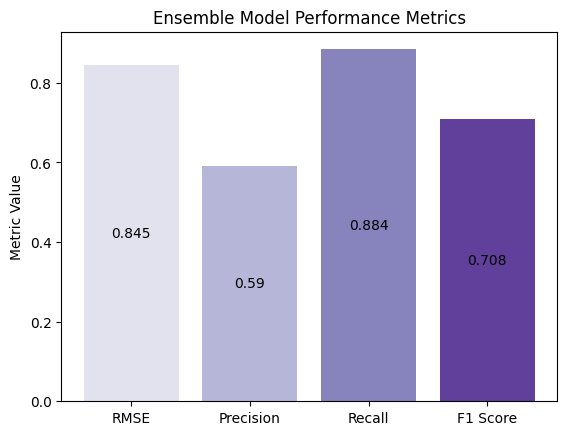

In [ ]:
rmse=0.845
precision=0.59
recall=0.884
f1=0.708

# List of performance metrics to be displayed on the bar chart
metrics = ['RMSE', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each metric (e.g., RMSE value, Precision value, etc.)
values = [rmse, precision, recall, f1]

# Use a seaborn color palette
palette = sns.color_palette('Purples', len(metrics))

# Creating a bar chart using matplotlib with specified metrics and values
bars = plt.bar(metrics, values, color=palette)

# Adding a title to the bar chart
plt.title('Ensemble Model Performance Metrics')

# Labeling the y-axis with "Metric Value"
plt.ylabel('Metric Value')

# Adding text labels on each bar with the rounded metric values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, round(value, 3),
             ha='center', va='center', color='black')

# Displaying the bar chart
plt.show()

**Observations and Insights:**

**RMSE (0.845):**

- The ensemble model achieved a cross-validated RMSE of 0.993, indicating the average deviation of the predicted ratings from the actual ratings. This metric shows the model’s accuracy in predicting user ratings.

**High Recall (0.884):**

- The high recall on the test set suggests that the model is effective in recommending songs that users might enjoy, minimizing instances where potentially enjoyable songs are missed.

**Moderate Precision (0.59):**

- The precision, while moderate, indicates that there might be a higher rate of recommending songs that users do not find enjoyable (false positives). This shows room for improvement in the model’s ability to filter out less relevant recommendations.

**F1 Score (0.708):**

- The F1 score provides a balance between precision and recall. In the context of a recommendation system, a balanced F1 score suggests a moderate compromise between minimizing missed opportunities and avoiding irrelevant recommendations.


Overall, the ensemble model combining Item-Item Collaborative Filtering and Matrix Factorization demonstrates strong performance with improvements on the test set, ensuring better music recommendations through balanced precision and recall metrics.

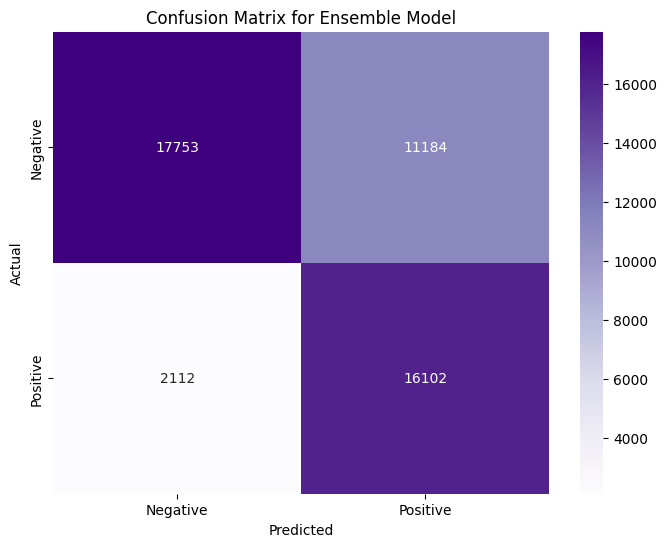

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(actual_ratings_test_binary, voting_predictions_test_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Observations and Insights:**

**Confusion Matrix Analysis:**

- True Positives (TP): 16,102
 - The model correctly identified 16,102 instances where users enjoyed the recommended songs.
- rue Negatives (TN): 17,753
 - he model accurately recognized 17,753 cases where users did not enjoy the songs, ensuring irrelevant recommendations were minimized.
- False Positives (FP): 11,184
 - There were 11,184 instances where the model incorrectly recommended songs that users did not enjoy, indicating room for improvement in precision.
- False Negatives (FN): 2,112
 - The model missed 2,112 instances where users would have enjoyed the recommended songs, suggesting potential enhancement in recall.

Overall, the confusion matrix provides valuable insights into the model’s performance, highlighting its strengths in accurate recommendations and areas for further refinement.



## **Recommendations for Implementation**

**Recommendations for Implementation**

1.	User-User Collaborative Filtering: Expand the dataset with diverse user information to enhance accuracy and efficacy while maintaining user privacy.
2.	Multi-Model Ensemble: Explore hybrid systems to leverage various modeling techniques while managing computational complexity.
3.	User Feedback Loop: Establish mechanisms for user feedback to continuously improve personalization and satisfaction.
4.	Monitoring and Evaluation: Regularly monitor model performance to ensure sustained recommendation quality.


**Stakeholder Actionables**

1.	Development Team: Regularly assess and address technical challenges.
2.	User Experience Team: Implement and gather feedback to measure recommendation effectiveness.
3.	Management: Allocate resources for integration and monitor key performance indicators.

**Expected Benefits and Costs**

•	Benefits: Improved recommendation accuracy, enhanced user satisfaction, increased platform retention.

•	Costs: Development, computational resources, user feedback mechanisms, and ongoing operational costs.

**Key Risks and Challenges**

1.	Model Degradation: Mitigate by regular performance monitoring.
2.	User Adoption: Gradual rollout with clear communication of benefits.

**Further Analysis**

1.	Diversity Analysis: Ensure broad coverage of musical genres and artists.
2.	Long-Term User Engagement: Investigate the impact on user engagement over time.
3.	Cold Start Problem: Address recommendations for new users or items with limited data.
4.	Dynamic Adaptation: Explore methods for the model to adapt to evolving user preferences.